# Import of load curves

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

demand_elec = ['demand_el','demand_el_ht','demand_el_tr']
demand_h2 = ['demand_h2_ht','demand_h2_id','demand_h2_tr','demand_h2_tr2']
demand_ng = ['demand_ng_ht','demand_ng_id','demand_ng_tr','demand_ng_tr2']

demands = dict()

for demand in demand_elec + demand_h2 + demand_ng:
    df = pd.read_csv(demand + '.csv')
    demands[demand] = df.values.tolist()
    demands[demand] = [demands[demand][i][0] for i in range(0,len(demands[demand]))]

# Fusion by energy vector

In [31]:
demand_vector = dict()
demand_vector['Electricity'] = [demands['demand_el'][i] +  demands['demand_el_ht'][i] for i in range(0,len(demands[demand]))]
demand_vector['Hydrogen'] = [demands['demand_h2_ht'][i] +  demands['demand_h2_id'][i] + demands['demand_h2_tr'][i] + demands['demand_h2_tr2'][i] for i in range(0,len(demands[demand]))]
demand_vector['Natural gas'] = [demands['demand_ng_ht'][i] +  demands['demand_ng_id'][i] + demands['demand_ng_tr'][i] + demands['demand_ng_tr2'][i] for i in range(0,len(demands[demand]))]

# Hourly load curves

## Winter days

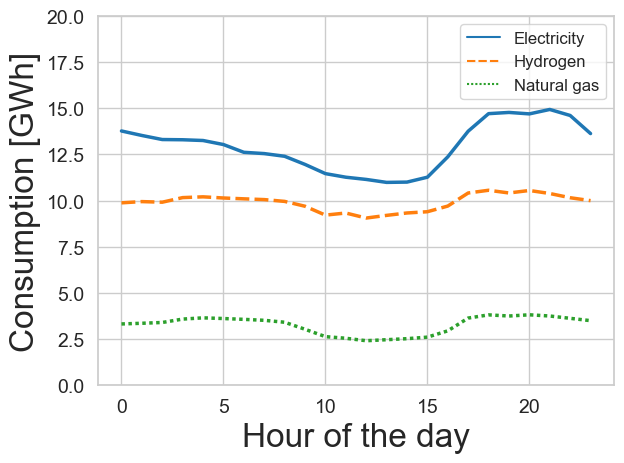

In [36]:
start = 0*24
days = 1

load_curves = dict()
vectors = ['Electricity', 'Hydrogen', 'Natural gas']
for vector in vectors:
    load_curves[vector] = demand_vector[vector][start:start+24*days]

sns.set_theme(style="whitegrid")
sns.lineplot(data=load_curves, palette="tab10", linewidth=2.5)
plt.xlabel("Hour of the day", fontsize = 24)
plt.ylabel("Consumption [GWh]", fontsize = 24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize = 12)
plt.ylim(0,20)
plt.tight_layout()
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\consumption_winter_days.pdf',dpi=600)
plt.show()

## Summer days

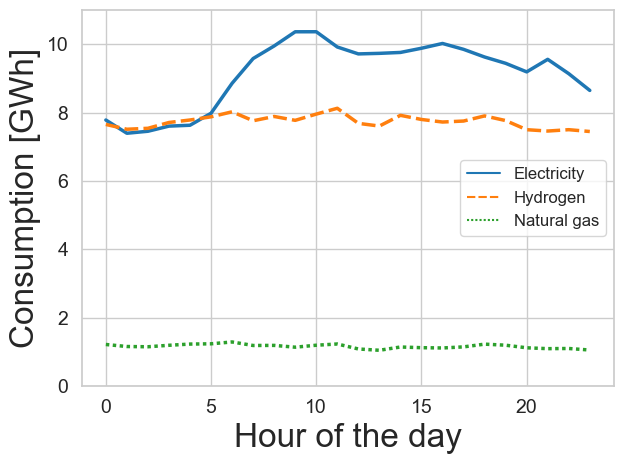

In [37]:
start = 197*24
days = 1

load_curves = dict()
vectors = ['Electricity', 'Hydrogen', 'Natural gas']
for vector in vectors:
    load_curves[vector] = demand_vector[vector][start:start+24*days]

sns.set_theme(style="whitegrid")
sns.lineplot(data=load_curves, palette="tab10", linewidth=2.5)
plt.xlabel("Hour of the day", fontsize = 24)
plt.ylabel("Consumption [GWh]", fontsize = 24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize = 12)
plt.ylim(0,11)
plt.tight_layout()
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\consumption_summer_days.pdf',dpi=600)
plt.show()